In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 10000
Number of Columns: 14


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["CreditScore","Age","Balance","EstimatedSalary"]]=sc.fit_transform(df[["CreditScore","Age","Balance","EstimatedSalary"]])

In [14]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1,0


In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

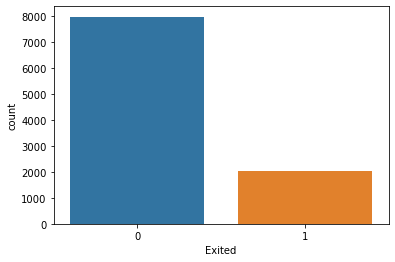

In [18]:
sns.countplot(df['Exited'])

In [19]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [20]:
x #pd.DataFrame(x)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,-1.225848,2,1,0,-0.066419,0,0,1
9996,-1.391939,-0.373958,10,-0.306379,1,1,1,0.027988,0,0,1
9997,0.604988,-0.278604,7,-1.225848,1,0,1,-1.008643,0,0,0
9998,1.256835,0.293517,3,-0.022608,2,1,0,-0.125231,1,0,1


In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling Technique
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [23]:
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=101) #stratify = y

In [25]:
x.shape, x_train.shape, x_test.shape

((15926, 11), (11944, 11), (3982, 11))

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score 

In [27]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [28]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
11552,-1.342538,0.685108,4,0.580914,1,0,0,-0.114681,1,0,1
12321,-0.599022,1.347722,4,-1.225848,1,0,0,-1.644175,0,0,0
12494,-0.671521,2.196699,8,-0.006869,1,0,0,-0.598220,0,0,1
3829,-0.657318,-0.278604,1,-0.091380,1,1,0,-1.208717,0,0,0
218,1.618972,0.388871,1,0.469810,2,1,0,-1.133801,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5695,1.412037,0.674932,7,0.660308,2,1,1,-0.117026,0,0,1
8006,0.677416,0.198164,8,0.795901,2,1,1,0.660103,1,0,1
1361,-0.750439,-0.660018,4,-1.225848,2,1,1,0.725688,0,0,1
1547,0.025569,-0.850726,2,0.188437,2,1,1,-0.059679,0,1,0


In [29]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2584,1.008513,0.102810,0,-1.225848,1,0,0,-0.689882,0,0,1
9766,1.546545,0.007457,4,0.300778,1,1,0,-1.498652,1,0,1
11015,-1.086282,1.402936,6,-1.225848,1,0,1,1.301405,0,0,0
14196,0.052027,0.613693,0,-1.225848,1,1,0,1.401043,0,0,1
1398,0.439440,-0.087897,3,-1.225848,2,0,0,-0.381806,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
326,-0.584891,-0.373958,2,-1.225848,2,1,0,0.058957,0,0,1
6378,-0.915988,-0.183251,2,-1.225848,1,0,1,-0.827109,0,0,1
5085,-1.071189,0.960993,8,0.722050,2,1,0,-0.931508,1,0,1
1677,1.380997,0.102810,8,-1.225848,2,1,0,0.153042,0,1,0


# LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [31]:
lr_pred 

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1988
           1       0.74      0.75      0.74      1994

    accuracy                           0.74      3982
   macro avg       0.74      0.74      0.74      3982
weighted avg       0.74      0.74      0.74      3982



In [33]:
cm1 = confusion_matrix(y_test,lr_pred)

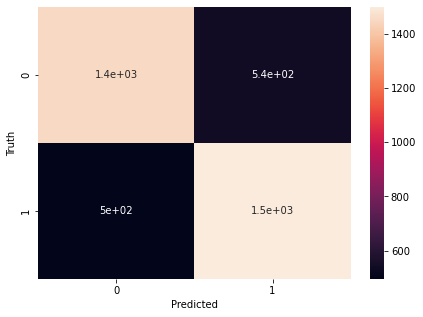

In [34]:
plt.figure(figsize=(7,5))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("image.jpg")

In [35]:
print(accuracy_score(y_test,lr_pred))

0.7398292315419387


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [37]:
knn_pred 

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [38]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1988
           1       0.80      0.95      0.87      1994

    accuracy                           0.86      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.86      0.86      3982



In [39]:
cm2 = (confusion_matrix(y_test,knn_pred))

Text(42.0, 0.5, 'Truth')

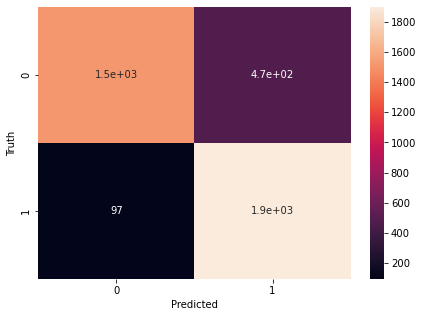

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
print(accuracy_score(y_test,knn_pred))

0.8566047212456053


In [42]:
#score = []

#for k in range(1,40):
    #knn=KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x_train,y_train)
    #knn_pred=knn.predict(x_test)
    #score.append(accuracy_score(y_test,knn_pred))
    #score

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

In [44]:
dtc_pred 

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [45]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1988
           1       0.81      0.84      0.82      1994

    accuracy                           0.82      3982
   macro avg       0.82      0.82      0.82      3982
weighted avg       0.82      0.82      0.82      3982



In [46]:
cm3 = confusion_matrix(y_test,dtc_pred)

Text(42.0, 0.5, 'Truth')

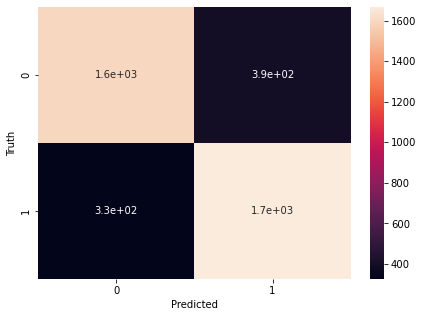

In [47]:
plt.figure(figsize=(7,5))
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
print(accuracy_score(y_test,dtc_pred))

0.8196885986941236


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

In [50]:
rfc_pred 

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1988
           1       0.88      0.86      0.87      1994

    accuracy                           0.87      3982
   macro avg       0.87      0.87      0.87      3982
weighted avg       0.87      0.87      0.87      3982



In [52]:
cm4 = confusion_matrix(y_test,rfc_pred)

Text(42.0, 0.5, 'Truth')

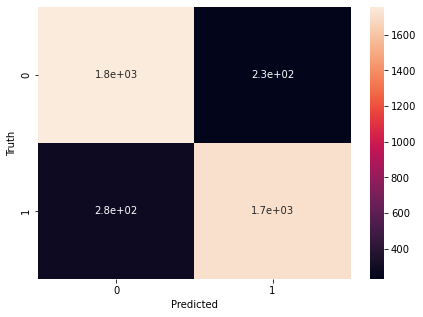

In [53]:
plt.figure(figsize=(7,5))
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
print(accuracy_score(y_test,rfc_pred))

0.8704168759417378


# SVM

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [56]:
svc_pred 

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1988
           1       0.78      0.80      0.79      1994

    accuracy                           0.79      3982
   macro avg       0.79      0.79      0.79      3982
weighted avg       0.79      0.79      0.79      3982



In [58]:
cm5 = confusion_matrix(y_test,svc_pred)

Text(42.0, 0.5, 'Truth')

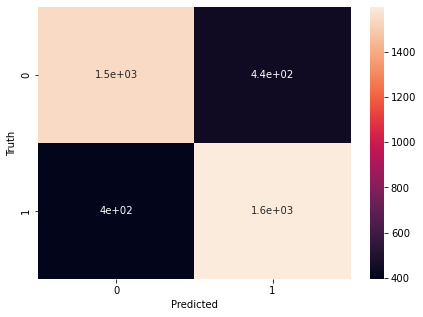

In [59]:
plt.figure(figsize=(7,5))
sns.heatmap(cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
print(accuracy_score(y_test,svc_pred))

0.7890507282772476


# XGBoost

In [61]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_train,y_train)
xb_pred = xb.predict(x_test)

In [62]:
xb_pred 

array([1, 0, 1, ..., 1, 0, 1])

In [63]:
print(classification_report(y_test,xb_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1988
           1       0.91      0.88      0.89      1994

    accuracy                           0.90      3982
   macro avg       0.90      0.90      0.90      3982
weighted avg       0.90      0.90      0.90      3982



In [64]:
cm6 = confusion_matrix(y_test,xb_pred)

Text(42.0, 0.5, 'Truth')

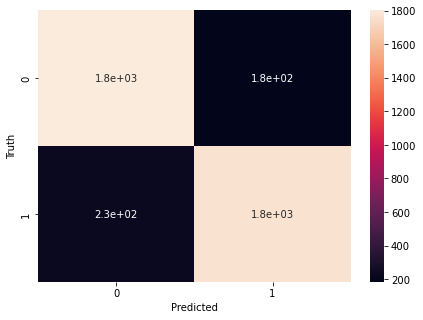

In [65]:
plt.figure(figsize=(7,5))
sns.heatmap(cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
print(accuracy_score(y_test,xb_pred))

0.8957810145655449


# AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

In [68]:
ab_pred 

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [69]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1988
           1       0.80      0.82      0.81      1994

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



In [70]:
cm7 = confusion_matrix(y_test,ab_pred)

Text(42.0, 0.5, 'Truth')

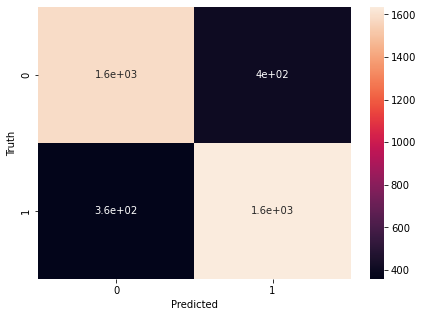

In [71]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
print(accuracy_score(y_test,ab_pred))

0.8083877448518333


# GradientBoosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [74]:
gb_pred 

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [75]:
CM8 = confusion_matrix(y_test,gb_pred)

Text(42.0, 0.5, 'Truth')

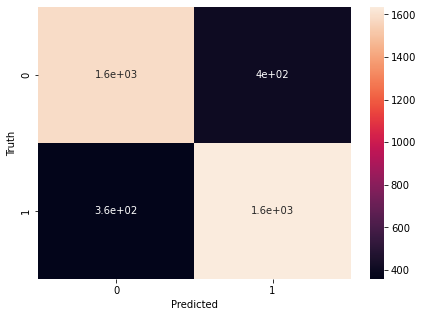

In [76]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1988
           1       0.83      0.84      0.83      1994

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.83      0.83      0.83      3982



In [78]:
print(accuracy_score(y_test,gb_pred))

0.833249623304872


In [79]:
final_data = pd.DataFrame({'Model':['LR','KNN','DT','RF','SVM','XB','AB','GB'],
                          'Accuracy':[accuracy_score(y_test,lr_pred),
                                     accuracy_score(y_test,knn_pred),
                                     accuracy_score(y_test,dtc_pred),
                                     accuracy_score(y_test,rfc_pred),
                                     accuracy_score(y_test,svc_pred),
                                     accuracy_score(y_test,xb_pred),
                                     accuracy_score(y_test,ab_pred),
                                     accuracy_score(y_test,gb_pred)]})

In [80]:
final_data
#plt.savefig('final.jpg')

,Model,Accuracy
0,LR,0.739829
1,KNN,0.856605
2,DT,0.819689
3,RF,0.870417
4,SVM,0.789051
5,XB,0.895781
6,AB,0.808388
7,GB,0.833250


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

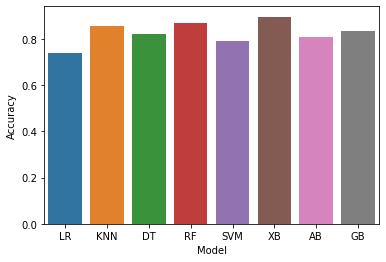

In [81]:
sns.barplot(final_data['Model'],final_data['Accuracy'])

# Joblib

In [82]:
new_customer = ([[619,42,2,0.000000,1,1,1,101348.880000,0,0,0]])

In [83]:
import joblib

In [84]:
joblib.dump(rfc,'model_joblib_heart')

['model_joblib_heart']

In [85]:
model = joblib.load('model_joblib_heart')

In [86]:
model.predict(new_customer)

array([0], dtype=int64)